In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [3]:
data = pd.read_csv('../dataset/Mall_Customers.csv')

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
x = data[['Annual Income (k)', 'Spending Score (1-100)']].copy()

In [6]:
x.sample(5)

,Annual Income (k),Spending Score (1-100)
186,101,24
32,33,4
96,60,47
66,48,50
114,65,48


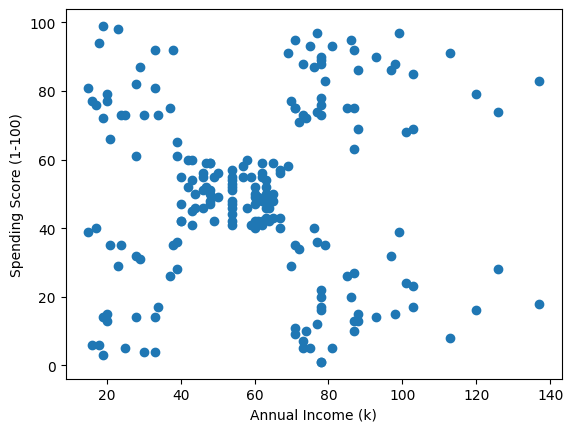

In [7]:
plt.scatter(x['Annual Income (k)'], x['Spending Score (1-100)'])
plt.xlabel('Annual Income (k)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [8]:
sse = [] # sum of squared error

for clusters in range(1, 10):
    k = KMeans(n_clusters=clusters)
    k.fit(x)
    sse.append(k.inertia_)

C:\Users\prabe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\prabe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\prabe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\prabe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

In [9]:
sse

[269981.28,
 182440.30762987013,
 106348.37306211119,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 30259.657207285465,
 25011.839349156595,
 21797.084944646373]

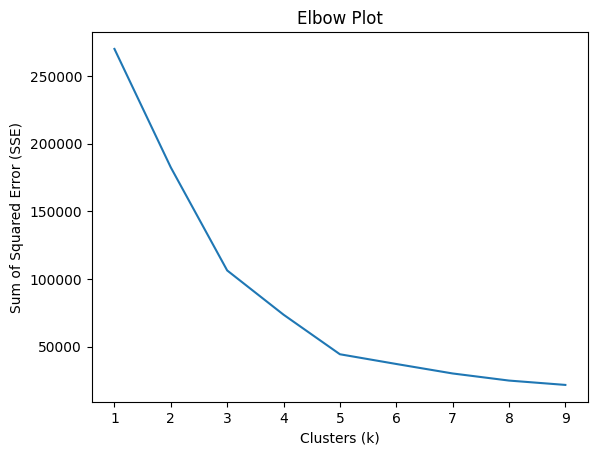

In [10]:
plt.plot(range(1, 10), sse)
plt.xlabel('Clusters (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.title('Elbow Plot')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=5, random_state=666)
kmeans.fit(x)

C:\Users\prabe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=666)

In [12]:
kmeans.labels_

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3,
       2, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 1, 3, 1, 0, 1, 0, 1,
       3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [13]:
x

,Annual Income (k),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [14]:
x = x.values

In [19]:
x[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

In [15]:
cluster_labels= kmeans.labels_

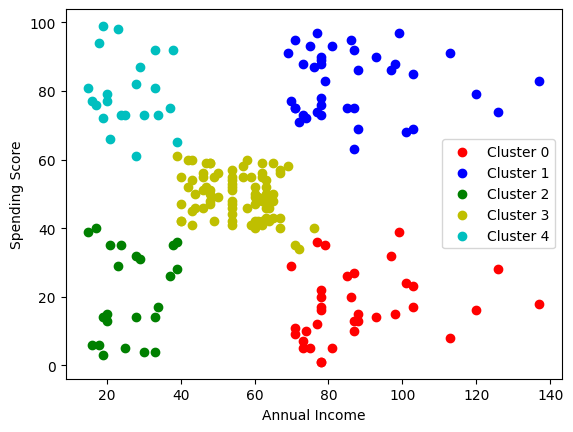

In [17]:
plt.scatter(x[cluster_labels==0, 0], x[cluster_labels==0, 1], c='r', label='Cluster 0')
plt.scatter(x[cluster_labels==1, 0], x[cluster_labels==1, 1], c='b', label='Cluster 1')
plt.scatter(x[cluster_labels==2, 0], x[cluster_labels==2, 1], c='g', label='Cluster 2')
plt.scatter(x[cluster_labels==3, 0], x[cluster_labels==3, 1], c='y', label='Cluster 3')
plt.scatter(x[cluster_labels==4, 0], x[cluster_labels==4, 1], c='c', label='Cluster 4')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


In [21]:
pred_data = [[90, 4], [120, 18], [20, 90]]

In [22]:
kmeans.predict(pred_data)

C:\Users\prabe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0, 0, 4])

In [23]:
agg = AgglomerativeClustering(n_clusters=5)
agg.fit(x)
cluster_labels = agg.labels_

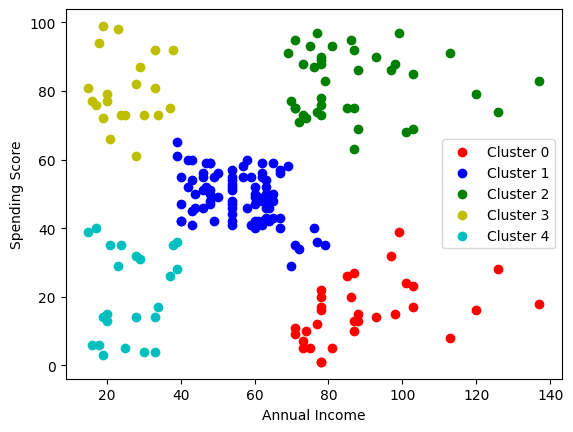

In [24]:
plt.scatter(x[cluster_labels==0, 0], x[cluster_labels==0, 1], c='r', label='Cluster 0')
plt.scatter(x[cluster_labels==1, 0], x[cluster_labels==1, 1], c='b', label='Cluster 1')
plt.scatter(x[cluster_labels==2, 0], x[cluster_labels==2, 1], c='g', label='Cluster 2')
plt.scatter(x[cluster_labels==3, 0], x[cluster_labels==3, 1], c='y', label='Cluster 3')
plt.scatter(x[cluster_labels==4, 0], x[cluster_labels==4, 1], c='c', label='Cluster 4')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


In [25]:
256 *256 * 256

16777216

In [26]:
2 ** 10

1024

In [27]:
1024 ** 3

1073741824

In [28]:
image = plt.imread('../dataset/traffic.jpg')

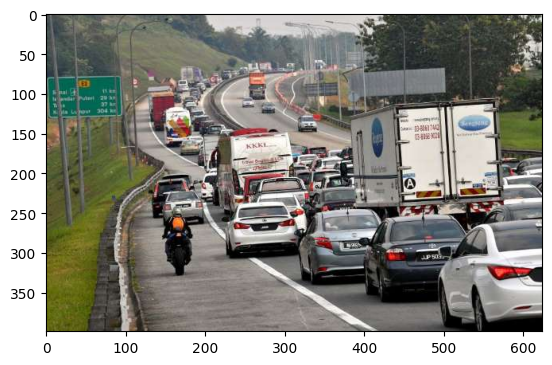

In [29]:
plt.imshow(image)
plt.show()

In [30]:
image.shape

(399, 624, 3)